# Problem Definition:

Many PDF files that are written in arabic language can't be searched nor copied. This is because the text in the PDF file is not encoded in a way that allows the text to be copied or searched. There are multiple reasons that cause this problem:
- one of them is that the text in the PDF file is an image and not a text
- the font used in the PDF file is not supported by the PDF reader.
- etc...

--- 
# Objective:

The objective of this document is to explore potential solutions for extracting text from Arabic PDF files that are non-searchable and non-copyable

This step is crucial for enabling further processes, such as building a Retrieval-Augmented Generation (RAG) based model using the extracted Arabic text.


In [2]:
import cv2
import os
import pytesseract
import pymupdf
from PIL import Image
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from langchain_ollama import OllamaLLM , ChatOllama
from openai import OpenAI
from IPython.display import display
from pdf2image import convert_from_path




### Show The Page

**The page below will be our measure for the quality of the extracted text**

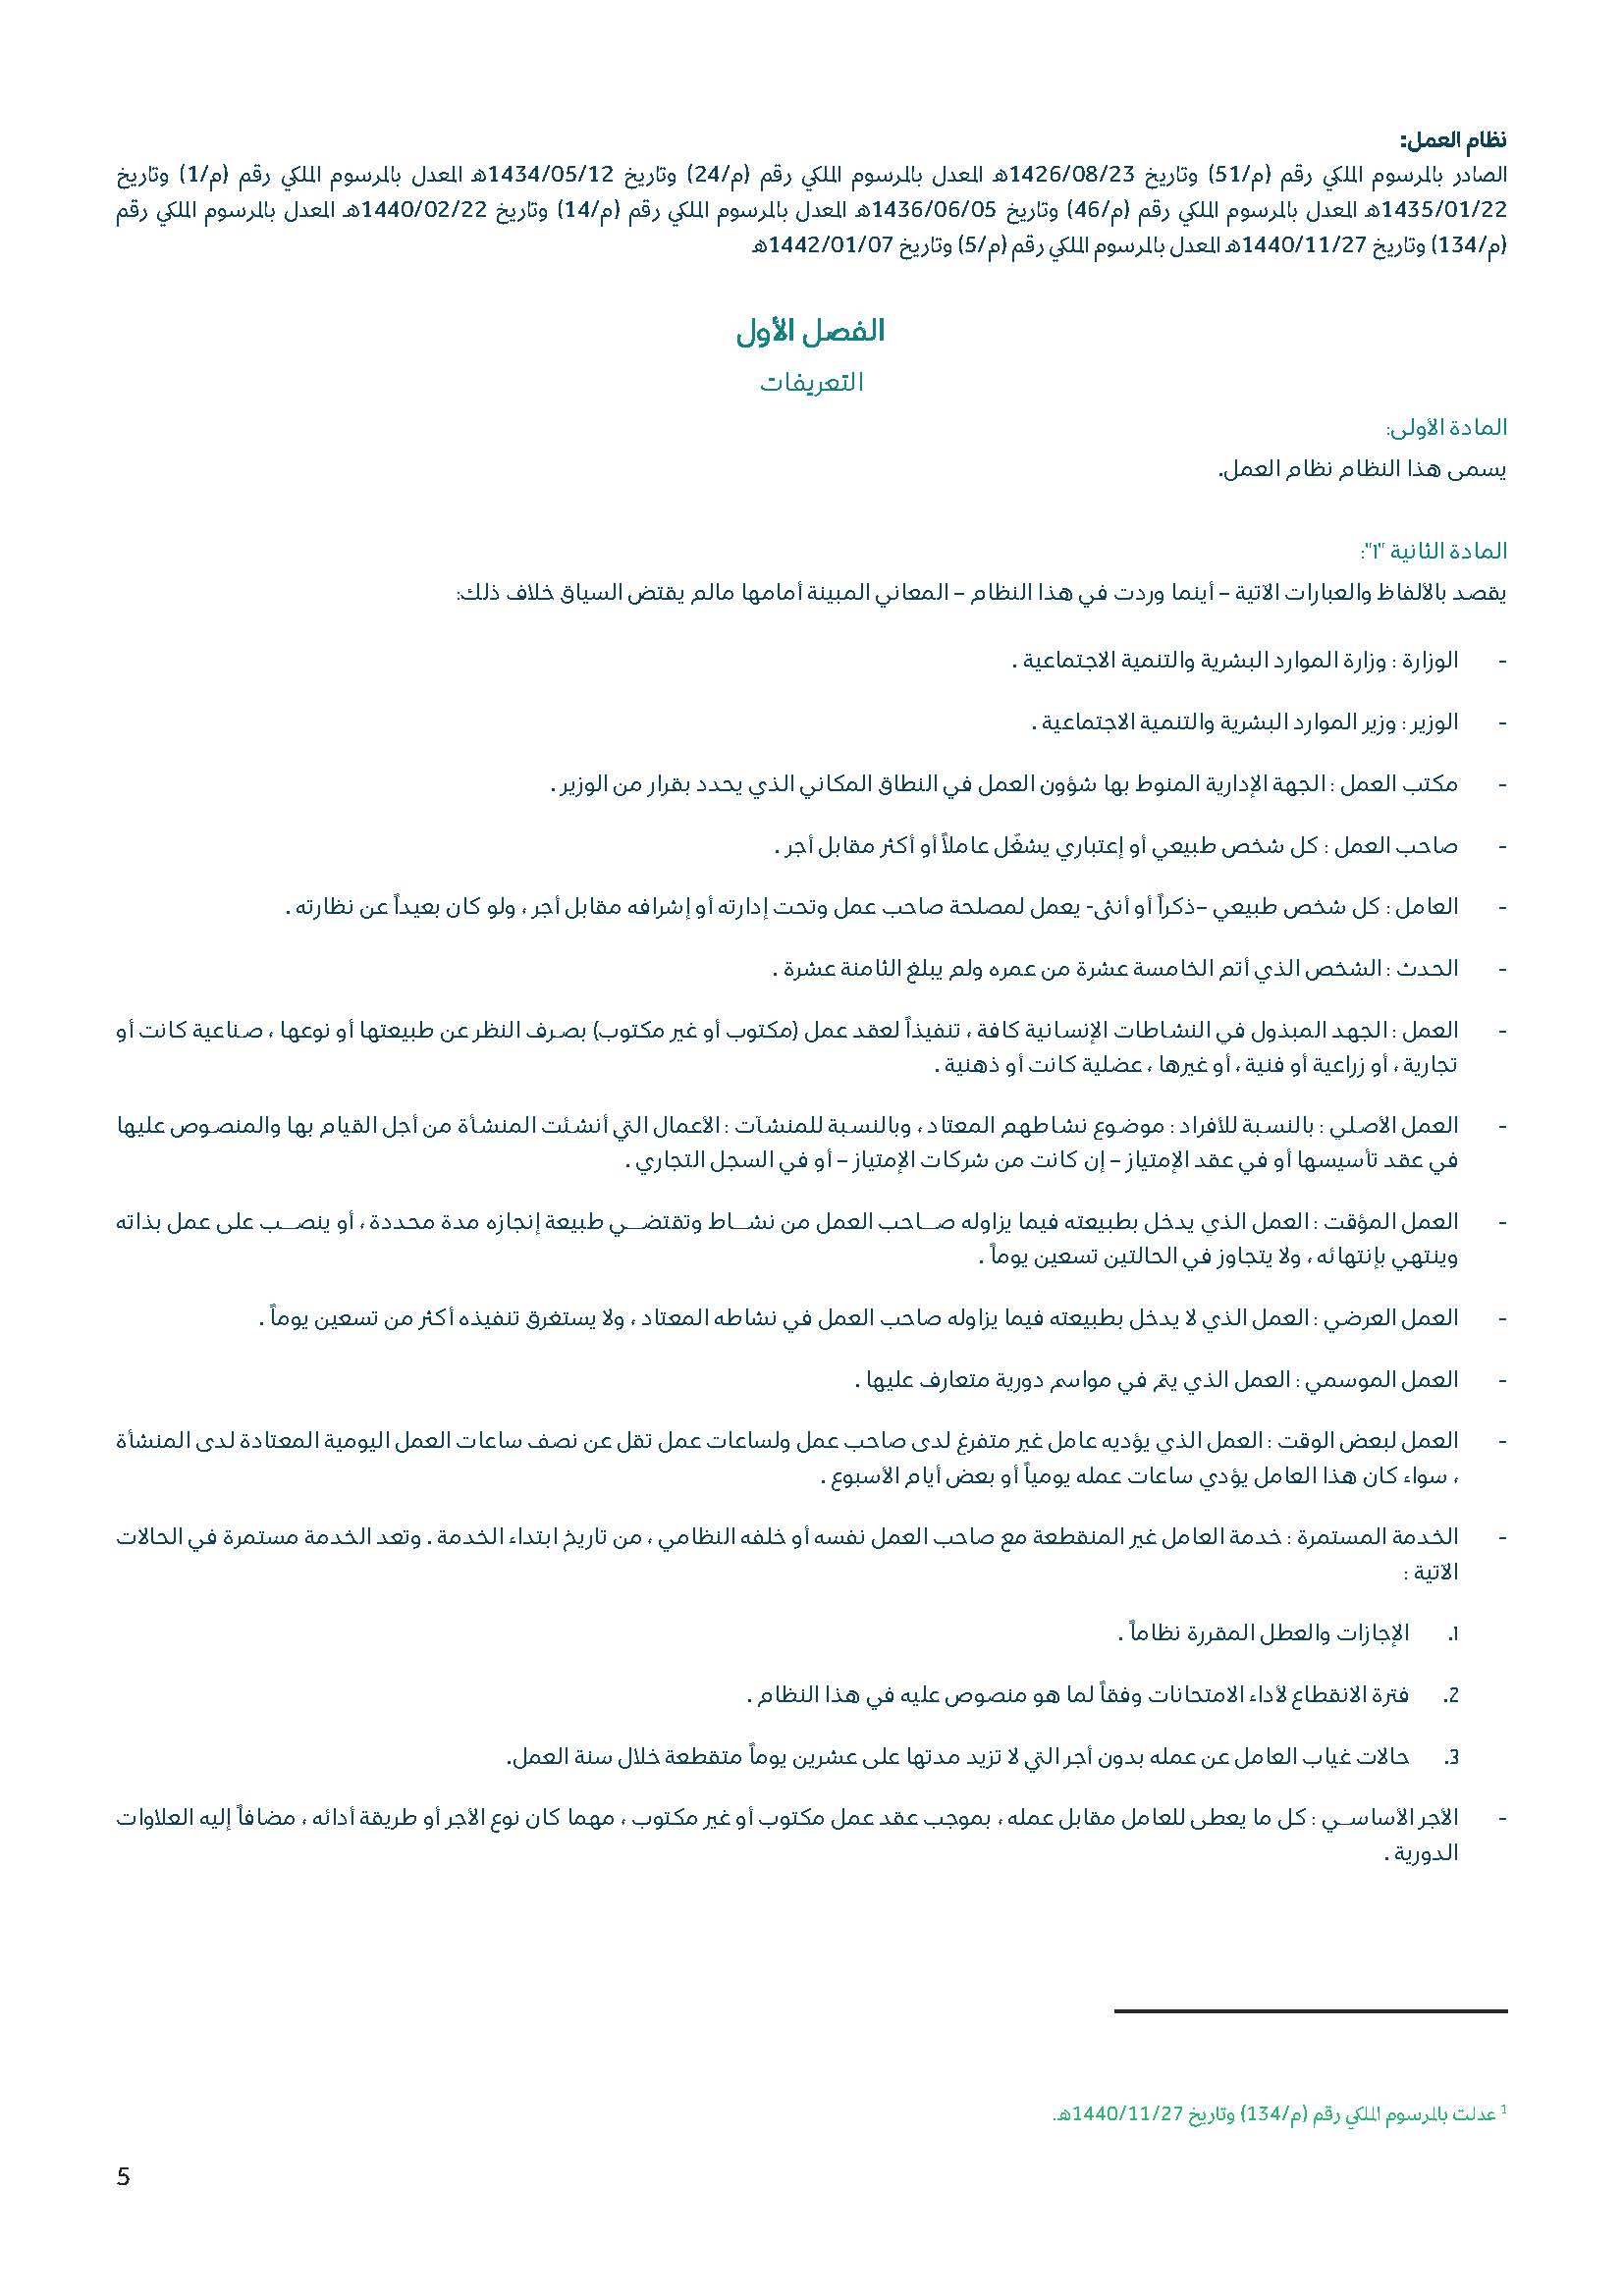

In [8]:
image = Image.open('./work_system_Page_05.jpg')
display(image)

### Read The PDF file

In [14]:

file = "./work_system.pdf"
pdf = pymupdf.open(file)
# read page number 5
page = pdf[5]
text = page.get_text()
print(text)

ﻧﻈﺎم اﻟﻌﻤﻞ: 
/م) ﻢﻗر 1 0ىكﻠﳌا مﻮﺳﺮﳌﺎﺑ ردﺎﺼﻟا51
( وﺗﺎرﻳﺦ 23
/
08
/
1426ـﻫ /م) ﻢﻗر 1 0ىكﻠﳌا مﻮﺳﺮﳌﺎﺑ لﺪﻌﳌا24
( وﺗﺎرﻳﺦ 12
/
05
/
1434ـﻫ /م) ﻢﻗر 1 0ىكﻠﳌا مﻮﺳﺮﳌﺎﺑ لﺪﻌﳌا1
( وﺗﺎرﻳﺦ 
22
/
01
/
1435ـﻫ  ﻢﻗر 1 0ىكﻠﳌا مﻮﺳﺮﳌﺎﺑ لﺪﻌﳌا)/م46
( وﺗﺎرﻳﺦ 05
/
06
/
1436ـﻫ /م) ﻢﻗر 1 0ىكﻠﳌا مﻮﺳﺮﳌﺎﺑ لﺪﻌﳌا14
( وﺗﺎرﻳﺦ 22
/
02
/
1440ــﻫ  ﻢﻗر 1 0ىكﻠﳌا مﻮﺳﺮﳌﺎﺑ لﺪﻌﳌا
)م/134
( وﺗﺎرﻳﺦ 27
/
11
/
1440ـﻫ /م) ﻢﻗر 1 0ىكﻠﳌا مﻮﺳﺮﳌﺎﺑ لﺪﻌﳌا5
( وﺗﺎرﻳﺦ 07
/
01
/
1442ﻫـ 
 
6
 
-
 اﻷﺟﺮ اﻟﻔﻌﻠﻲ : اﻷﺟﺮ اﻷﺳـﺎﳼ ﻣﻀـﺎﻓﺎً إﻟﻴﻪ ﺳـﺎﺋﺮ اﻟﺰﻳﺎدات اﻟﻤﺴـﺘﺤﻘﺔ اﻷﺧﺮى اﻟﱵ ﺗﺘﻘﺮر ﻟﻠﻌﺎﻣﻞ ﻣﻘﺎﺑﻞ ﺟﻬﺪ ﺑﺬﻟﻪ ﻓﻲ اﻟﻌﻤﻞ ، أو ﻣﺨﺎﻃﺮ ﻳﺘﻌﺮض ﻟﻬﺎ ﻓﻲ أداء 
ﻋﻤﻠﻪ ، أو اﻟﱵ ﺗﺘﻘﺮر ﻟﻠﻌﺎﻣﻞ ﻟﻘﺎء اﻟﻌﻤﻞ ﺑﻤﻮﺟﺐ ﻋﻘﺪ اﻟﻌﻤﻞ أو ﻻﺋﺤﺔ ﺗﻨﻈﲓ اﻟﻌﻤﻞ . وﻣﻦ ذﻟﻚ :  
1.
 اﻟﻌﻤﻮﻟﺔ ، أو اﻟﻨﺴــﺒﺔ اﻟﻤﺌﻮﻳﺔ ﻣﻦ اﻟﻤﺒﻴﻌﺎت ، أو اﻟﻨﺴــﺒﺔ اﻟﻤﺌﻮﻳﺔ ﻣﻦ اﻷرﺑﺎح ، اﻟﱵ ﺗﺪﻓﻊ ﻣﻘﺎﺑﻞ ﻣﺎ ﻳﻘﻮم ﺑﺘﺴــﻮﻳﻘﻪ ، أو إﻧﺘﺎﺟﻪ ، أو ﺗﺤﺼــﻴﻠﻪ ، أو ﻣﺎ ﻳﺤﻘﻘﻪ 
ﻣﻦ زﻳﺎدة اﻹﻧﺘﺎج أو ﺗﺤﺴﻴﻨﻪ . 
2.
 اﻟﺒﺪﻻت اﻟﱵ ﻳﺴﺘﺤﻘﻬﺎ اﻟﻌﺎﻣﻞ ﻟﻘﺎء ﻃﺎﻗﺔ ﻳﺒﺬﻟﻬﺎ ، أو ﻣﺨﺎﻃﺮ ﻳﺘﻌﺮض ﻟﻬﺎ ﻓﻲ أداء ﻋﻤﻠﻪ . 
3.
 اﻟﺰﻳﺎدات اﻟﱵ ﻗﺪ ﺗﻤﻨﺢ وﻓﻘﺎً ﻟﻤﺴﺘﻮى اﻟﻤﻌﻴﺸﺔ ، أو ﻟﻤﻮاﺟﻬﺔ أﻋﺒﺎء ا

**Problem**
The arabic can't be copied or extracted directly from the PDF file, next we will use OCR extract the text from the PDF file.

In [6]:
pages = convert_from_path("./work_system.pdf", dpi = 600)

text = pytesseract.image_to_string(pages[4], lang='ara') 
'''
specifying the language is crucial, as the default language is English
Also beelow we will use config to specify the page segmentation mode, this can maintain the page stracture
'''
print(text)

نظام العمل:

الصادر بالمرسوم الملكي رقم (م/51) وتاريخ 1426/08/23ه المعدل بالمرسوم الملكي رقم (م/24) وتاريخ 1434/05/12ه المعدل بالمرسوم الملكي رقم (م/1) وتاريخ
2 العدل بالمرسوم الملكي رقم (م/46) وتاريخ 1436/06/05ه المعدل بالمرسوم الملكي رقم (م/14) وتاريخ 1440/02/22ه المعدل بالمرسوم الملكي رقم
(م/154) وتاريخ 1440/11/27ه المعدل بالمرسوم الملكي رقم (م/5) وتاريخ 1442/01/07ه

الفصل الأول
التعريفات
المادة الأولى:
يسمى هذا النظام نظام العمل.

المادة الثانية "1":

يقصد بالألفاظ والعبارات الآتية - أينما وردت في هذا النظام - المعاني المبينة أمامها مالم يقتض السياق خلاف ذلك:

- الوزارة : وزارة الموارد البشرية والتنمية الاجتماعية .

- الوزير: وزير الموارد البشرية والتنمية الاجتماعية .

- مكتب العمل: الجهة الإدارية المنوط بها شؤون العمل في النطاق المكاني الذي يحدد بقرار من الوزير .

- صاحب العمل : كل شخص طبيعي أو إعتباري يشغْل عاملاً أو أكثر مقابل أجر .

- العامل : كل شخص طبيعي -ذكراً أو أنى- يعمل لمصلحة صاحب عمل وتحت إدارته أو إشرافه مقابل أجرء ولو كان بعيداً عن نظارته .
- الحدث:الشخص الذي أته الخا

### GPT 4o error correction:
consider that some of the corrected words were misspelled from the document itself, or the GPT model correction was not right therefore these are the actual errors in the text.

"أنى" should be "أنثى" (correct spelling).

"أته" should be "أتم" (correct spelling).

"أجرء" should be "أجر" (remove the Hamza at the end).

"يم" should be "يتم" (missing letter).

"الخدمةالمستمرة" should be "الخدمة المستمرة" (add space).

"فترةالانقطاع" should be "فترة الانقطاع" (add space).

**Find below the GPT 4o corrected text with the actual errors highlighted:**


--- 
Here’s the text with the misspelled words highlighted in `{{}}`:



**نظام العمل**:

الصادر بالمرسوم الملكي رقم (م/51) وتاريخ 1426/08/23ه المعدل بالمرسوم الملكي رقم (م/24) وتاريخ 1434/05/12ه المعدل بالمرسوم الملكي رقم (م/1) وتاريخ 1436/06/05ه المعدل بالمرسوم الملكي رقم (م/14) وتاريخ 1440/02/22ه المعدل بالمرسوم الملكي رقم (م/154) وتاريخ 1440/11/27ه المعدل بالمرسوم الملكي رقم (م/5) وتاريخ 1442/01/07ه

**الفصل الأول**  
**التعريفات**  
**المادة الأولى**:  
يسمى هذا النظام نظام العمل.

**المادة الثانية "1"**:

يقصد بالألفاظ والعبارات الآتية - أينما وردت في هذا النظام - المعاني المبينة أمامها مالم يقتض السياق خلاف ذلك:

- الوزارة: وزارة الموارد البشرية والتنمية الاجتماعية.
- الوزير: وزير الموارد البشرية والتنمية الاجتماعية.
- مكتب العمل: الجهة الإدارية المنوط بها شؤون العمل في النطاق المكاني الذي يحدد بقرار من الوزير.
- صاحب العمل: كل شخص طبيعي أو {{إعتباري}} يشغْل عاملاً أو أكثر مقابل أجر.
- العامل: كل شخص طبيعي -ذكراً أو {{أنى}}- يعمل لمصلحة صاحب عمل وتحت إدارته أو إشرافه مقابل {{أجرء}} ولو كان بعيداً عن نظارته.
- الحدث: الشخص الذي {{أته}} الخامسة عشرة من عمره ولم يبلغ الثامنة عشرة.
- العمل: الجهد المبذول في النشاطات الإنسانية كافة، تنفيذاً لعقد عمل (مكتوب أو غير مكتوب) بصرف النظر عن طبيعتها أو نوعها. صناعية كانت أو تجارية، أو زراعية أو فنية، أو غيرها. عضلية كانت أو ذهنية.
- العمل الأصلي: بالنسبة للأفراد: موضوع نشاطهم المعتاد؛ وبالنسبة للمنشآت: الأعمال التي أنشئت المنشأة من أجل القيام بها والمنصوص عليها في عقد تأسيسها أو في عقد الإمتياز - إن كانت من شركات الإمتياز - أو في السجل التجاري.
- العمل المؤقت: العمل الذي يدخل بطبيعته فيما يزاوله صاحب العمل من نشاط وتقتضي طبيعة إنجازه مدة محددة؛ أو ينصب على عمل بذاته وينتهي {{بإنتهائه}}، ولا يتجاوز في الحالتين تسعين يوماً.
- العمل العرضي: العمل الذي لا يدخل بطبيعته فيما يزاوله صاحب العمل في نشاطه المعتاد؛ ولا يستغرق تنفيذه أكثر من تسعين يوماً.
- العمل الموسمي: العمل الذي {{يم}} في مواسم دورية متعارف عليها.
- العمل لبعض الوقت: العمل الذي يؤديه عامل غير متفرغ لدى صاحب عمل ولساعات عمل تقل عن نصف ساعات العمل اليومية المعتادة لدى المنشأة، سواء كان هذا العامل يؤدي ساعات عمله يومياً أو بعض أيام الأسبوع.
- {{الخدمةالمستمرة}}: خدمة العامل غير المنقطعة مع صاحب العمل نفسه أو خلفه النظامي؛ من تاريخ ابتداء الخدمة. وتعد الخدمة مستمرة في الحالات الآتية:
  1. الإجازات والعطل المقررة نظاماً.
  2. {{فترةالانقطاع}} لأداء الامتحانات وفقاً لما هو منصوص عليه في هذا النظام.
  3. حالات غياب العامل عن عمله بدون أجر التي لا تزيد مدتها على عشرين يوماً متقطعة خلال سنة العمل.
- الأجر الأساسي: كل ما يعطى للعامل مقابل عمله، بموجب عقد عمل مكتوب أو غير مكتوب، مهما كان نوع الأجر أو طريقة أدائه، مضافاً إليه العلاوات الدورية.

---


In [9]:
import pytesseract
from pdf2image import convert_from_path

pages = convert_from_path("./work_system.pdf", dpi = 1000)

text = pytesseract.image_to_string(pages[4], lang='ara') 
print(text)

c:\Users\turki\Documents\script\LLM\.conda\lib\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (96647480 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


نظام العمل:

الصادر بالمرسوم الملكي رقم (م/51) وتاريخ 1426/08/25ه المعدل بالمرسوم الملكى رقم (م/24) وتاريخ 1454/05/12ه المعدل بالمرسوم الملكى رقم (م/1) وتاريخ
2 االعدل بالمرسوم الملكى رقم (م/46) وتاريخ 1456/06/05ه المعدل بالمرسوم الملكى رقم (م/14) وتاريخ 1440/02/22ه المعدل بالمرسوم الملكي رقم
(م/154) وتاريخ 1440/11/27ه المعدل بالمرسوم الملكىي رقم (م/5) وتاريخ 1442/01/07ه

الفصل الأول
التعريفات
المادة الأولى:
يسمن هذا النظام نظام العمل.

المادة الثانية ‎١"‏ :

يقصد بالألفاظ والعبارات الآتية - أينما وردت في هذا النظام - المعاني المبينة أمامها مالم يقتض السياق خلاف ذلك:

- الوزارة: وزارة الموارد البشرية والتنمية الاجتماعية .

- الوزير: وزير الموارد البشرية والتنمية الاجتماعية .

- مكتب العمل: الجهة الإدارية المنوط بها شؤون العمل في النطاق المكاني الذي يحدد بقرار من الوزير .

- صاحب العمل : كل شخص طبيعي أو إعتباري يشغل عاملاً أو أكثر مقابل أجر .

- العامل: كل شخص طبيعي -ذكراً أو أنى- يعمل لمصلحة صاحب عمل وتحت إدارته أو إشرافه مقابل أجر »؛ ولو كان بعيداً عن نظارته .
- الحدث: الشخص الذي أتم 

**when Increasing the DPI didn't show an improvement in the OCR results**

for reference, this is the errors labeled by GPT 4o:

--- 

Here are the misspelled words highlighted in `{{}}`:

---

**نظام العمل**:

الصادر بالمرسوم الملكي رقم (م/51) وتاريخ 1426/08/25ه المعدل بالمرسوم **{{الملكى}}** رقم (م/24) وتاريخ **{{1454/05/12ه}}** المعدل بالمرسوم **{{الملكى}}** رقم (م/1) وتاريخ 1436/06/05ه **{{االعدل}}** بالمرسوم **{{الملكى}}** رقم (م/46) وتاريخ **{{1456/06/05ه}}** المعدل بالمرسوم الملكي رقم (م/154) وتاريخ 1440/11/27ه المعدل بالمرسوم **{{الملكيي}}** رقم (م/5) وتاريخ 1442/01/07ه

**الفصل الأول**  
**التعريفات**  
**المادة الأولى**:  
**{{يسمن}}** هذا النظام نظام العمل.

**المادة الثانية "1"**:

يقصد بالألفاظ والعبارات الآتية - أينما وردت في هذا النظام - المعاني المبينة أمامها ما لم يقتض السياق خلاف ذلك:

- الوزارة: وزارة الموارد البشرية والتنمية الاجتماعية.
- الوزير: وزير الموارد البشرية والتنمية الاجتماعية.
- مكتب العمل: الجهة الإدارية المنوط بها شؤون العمل في النطاق المكاني الذي يحدد بقرار من الوزير.
- صاحب العمل: كل شخص طبيعي أو **{{إعتباري}}** يشغل عاملاً أو أكثر مقابل أجر.
- العامل: كل شخص طبيعي - ذكراً أو **{{أنى}}** - يعمل لمصلحة صاحب عمل وتحت إدارته أو إشرافه مقابل أجر؛ ولو كان بعيداً عن نظارته.
- الحدث: الشخص الذي أتم الخامسة عشرة من عمره ولم يبلغ الثامنة عشرة.
- العمل: الجهد المبذول في النشاطات الإنسانية كافة، تنفيذاً لعقد عمل (مكتوب أو غير مكتوب) بصرف النظر عن طبيعتها أو نوعها. صناعية كانت أو تجارية، أو زراعية أو فنية، أو غيرها. عضلية كانت أو ذهنية.
- العمل الأصلي: بالنسبة للأفراد: موضوع نشاطهم المعتاد؛ وبالنسبة للمنشآت: الأعمال التي أنشئت المنشأة من أجل القيام بها والمنصوص عليها في عقد تأسيسها أو في عقد الامتياز - إن كانت من شركات الامتياز - أو في السجل التجاري.
- العمل المؤقت: العمل الذي يدخل بطبيعته فيما يزاوله صاحب العمل من نشاط وتقتضي طبيعة إنجازه مدة محددة، أو ينصب على عمل بذاته وينتهي **{{بإنتهائه}}**، ولا يتجاوز في الحالتين تسعين يوماً.
- العمل العرضي: العمل الذي لا يدخل بطبيعته فيما يزاوله صاحب العمل في نشاطه المعتاد ولا يستغرق تنفيذه أكثر من تسعين يوماً.
- العمل الموسمي: العمل الذي **{{يم}}** في مواسم دورية متعارف عليها.
- العمل لبعض الوقت: العمل الذي يؤديه عامل غير متفرغ لدى صاحب عمل ولساعات عمل تقل عن نصف ساعات العمل اليومية المعتادة لدى المنشأة، سواء كان هذا العامل يؤدي ساعات عمله يومياً أو بعض أيام الأسبوع.
- الخدمة المستمرة: خدمة العامل غير المنقطعة مع صاحب العمل نفسه أو خلفه النظامي؛ من تاريخ ابتداء الخدمة. وتعد الخدمة مستمرة في الحالات الآتية:
  1. الإجازات والعطل المقررة نظاماً.
  2. فترة الانقطاع لأداء الامتحانات وفقاً لما هو منصوص عليه في هذا النظام.
  3. حالات غياب العامل عن عمله بدون أجر التي لا تزيد مدتها على عشرين يوماً متقطعة خلال سنة العمل.
- الأجر الأساسي: كل ما يعطى للعامل مقابل عمله، بموجب عقد عمل مكتوب أو غير مكتوب، مهما كان نوع الأجر أو طريقة أدائه، مضافاً إليه العلاوات الدورية.

* عدلت بالمرسوم الملكي رقم (م/154) وتاريخ 1440/11/27ه.

---

Let me know if you'd like me to assist further!

# Other approaches

### Extract Text from a thresholded image

In [1]:
image_path = "./work_system_Page_05.jpg"

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

_, img_bin = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY) # 155 is the threshold value 

text = pytesseract.image_to_string(img_bin, lang='ara', config='--psm 6 --oem 1')
'''
Below more description about the config options

 --psm NUM             Specify page segmentation mode.
  --oem NUM             Specify OCR Engine mode.
NOTE: These options must occur before any configfile.
Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.
OCR Engine modes: (see https://github.com/tesseract-ocr/tesseract/wiki#linux)
  0    Legacy engine only.
  1    Neural nets LSTM engine only.
  2    Legacy + LSTM engines.
  3    Default, based on what is available.


'''


print(f"Text from:\n{text}\n")

Text from:
نظام العمل:
الصادر بالمرسوم الملكي رقم (م/51) وتاريخ 1426/08/23ه المعدل بالرسوم الملكي رقم (م/24) وتاريخ 1434/05/12ه المعدل بالمرسوم الملكي رقم (م/1) وتاريخ
2 العدل بالمرسوم الملكي رقم (م/46) وتاريخ 1456/06/05ه المعدل بالمرسوم الملكي رقم (م/14) وتاريخ 1440/02/22ه العدل بالرسوم الملكي رقم
(م/134) وتاريخ 1440/11/27ه العدل بالمرسوم اللكي رقم (م/5) وتاريخ 1442/01/07ه
الفصل الأول
التعريفات
المادة الأولن:
يسمن هذا النظام نظام العمل.
المادة الثانية "1"
يقصد بالألفاظ والعبارات الآتية - أينما وردت في هذا النظام - المعاني المبينة أمامها مالم يقتض السياق خلاف ذلك:
- الوزارة : وزارة الموارد البشرية والتنمية الاجتماعية .
- الوزير: وزير الموارد البشرية والتنمية الاجتماعية .
- مكتب العمل :الجهة الإدارية المنوط بها شؤون العمل في النطاق المكاني الذي يحدد بقرار من الوزير.
- صاحب العمل : كل شخص طبيعي أو إعتباري يشقّل عاملاً أو أكثر مقابل أجر .
- العامل: كل شخص طبيعي -ذكراً أو أنى- يعمل لمصلحة صاحب عمل وتحت إدارته أو إشرافه مقابل أجر ؛ ولو كان بعيداً عن نظارته .
- الحدث :الشخص الذي أتم الخامسة 

Text from:
نظام العمل:
الصادر بالمرسوم الملكي رقم (م/51) وتاريخ 1426/08/23ه المعدل بالرسوم الملكي رقم (م/24) وتاريخ 1434/05/12ه المعدل بالمرسوم الملكي رقم (م/1) وتاريخ
2 العدل بالمرسوم الملكي رقم (م/46) وتاريخ 1456/06/05ه المعدل بالمرسوم الملكي رقم (م/14) وتاريخ 1440/02/22ه العدل بالرسوم الملكي رقم
(م/134) وتاريخ 1440/11/27ه العدل بالمرسوم اللكي رقم (م/5) وتاريخ 1442/01/07ه
الفصل الأول
التعريفات
المادة الأولن:
يسمن هذا النظام نظام العمل.
المادة الثانية "1"
يقصد بالألفاظ والعبارات الآتية - أينما وردت في هذا النظام - المعاني المبينة أمامها مالم يقتض السياق خلاف ذلك:
- الوزارة : وزارة الموارد البشرية والتنمية الاجتماعية .
- الوزير: وزير الموارد البشرية والتنمية الاجتماعية .
- مكتب العمل :الجهة الإدارية المنوط بها شؤون العمل في النطاق المكاني الذي يحدد بقرار من الوزير.
- صاحب العمل : كل شخص طبيعي أو إعتباري يشقّل عاملاً أو أكثر مقابل أجر .
- العامل: كل شخص طبيعي -ذكراً أو أنى- يعمل لمصلحة صاحب عمل وتحت إدارته أو إشرافه مقابل أجر ؛ ولو كان بعيداً عن نظارته .
- الحدث :الشخص الذي أتم الخامسة عشرة من عمره ولم يبلغ الثامنة عشرة .
- العمل :الجهد المبذول في النشاطات الإنسانية كافة , تنفيذاً لعقد عمل (مكتوب أو غير مكتوب) بصرف النظر عن طبيعتها أو نوعها , صناعية كانت أو
تجارية , أو زراعية أو فنية ؛ أو غيرها . عضلية كانت أو ذهنية .
- العمل الأصلي : بالنسبة للأفراد: موضوع نشاطهم المعتاد : وبالنسبة للمنشآت : الأعمال الي أنشئت المنشأة من أجل القيام بها والمنصوص عليها
في عقد تأسيسها أو في عقد الإمتياز - إن كانت من شركات الإمتياز - أو في السجل التجاري .
- العمل المؤقت :العمل الذي يدخل بطبيعته فيما يزاوله صاحب العمل من نش اط وتقتضي طبيعة إنجازه مدة محددة , أو ينص ب على عمل بذاته
وينتهي بإنتهائه: ولا يتجاوز في الحالتين تسعين يوما .
- العمل العرضي :العمل الذي لا يدخل بطبيعته فيما يزاوله صاحب العمل في نشاطه المعتاد , ولا يستغرق تنفيذه أكثر من تسعين يوماً .
- العمل الموسمي : العمل الذي يقر في مواسم دورية متعارف عليها .
- العمل لبعض الوقت : العمل الذي يؤديه عامل غير متفرغ لدى صاحب عمل ولساعات عمل تقل عن نصف ساعات العمل اليومية المعتادة لدى المنشأة
+ سواء كان هذا العامل يؤدي ساعات عمله يومياً أو بعض أيام الأسبوع .
- الخدمة المستمرة : خدمة العامل غير المنقطعة مع صاحب العمل نفسه أو خلفه النظا مي ؛ من تاريخ ابتداء الخدمة . وتعد الخدمة مستمرة في الحالات
الآتية :
1. الإجازات والعطل المقررة نظاماً .
2. فترة الانقطاع لأداء الامتحانات وفقاً لما هو منصوص عليه في هذا النظام .
3. حالات غياب العامل عن عمله بدون أجر التي لا تزيد مدتها على عشرين يوماً متقطعة خلال سنة العمل.
- الأجرالاساسي : كل ما يعطن للعامل مقابل عمله؛ بموجب عقد عمل مكتوب أو غبر مكتوب , مهما كان نوع الأجر أو طريقة أدائه , مضافاً إليه العلاوات
الدورية .
+ عدلت بالرسوم الملكي رقم (م/154) وتاريخ 1440/11/27ه.
5





### Extract Text image (with segmentation)

In [8]:


image_path = "./work_system_Page_05.jpg"
img = Image.open(image_path)
# with text segmentation
text = pytesseract.image_to_string(img, lang='ara', config='--psm 1 --oem 3') 

# Print the extracted text
print(f"Text from:\n{text}\n")


Text from:
نظام العمل:

الصادر بالرسوم الملي رقم (م/51) وتاريخ 1426/08/23ه العدل بالرسوم اللي رقم (م/24) وتاريخ 1454/05/12ه العدل بالمرسوم اللي رقم (م/1) وتاريخ
2 العدل بالمرسوم اللي رقم (م/46) وتاريخ 1436/06/05ه العدل بالمرسوم الملي رقم (م/14) وتاريخ 1440/02/22ه المعدل بالرسوم اللكي رقم
(م/154) وتاريخ 1440/11/27ه العدل بالرسوم اللي رقم (م/5) وتاريخ 1442/01/07ه

الفصل الأول
التعريفات
المادة الأولن:
يسمن هذا النظام نظام العمل.

  

  

المادة الثاني
يقصد بالألفاظ والعبارات الآتية - أينما وردت في هذا النظام - المعاني المبينة أمامها مالم يقتض السياق خلاف ذلك:

- الوزارة : وزارة الموارد البشرية والتنمية الاجتماعية .

- الوزير: وزير الموارد البشرية والتنمية الاجتماعية .

- مكتب العمل :الجهة الإدارية المنوط بها شؤون العمل في النطاق المكاني الذي يحدد بقرار من الوزير.

- صاحب العمل : كل شخص طبيعي أو إعتباري يشفل عاملاً أو أكثر مقابل أجر .

- العامل: كل شخص طبيعي -ذكراً أو أنى- يعمل لمصلحة صاحب عمل وتحت إدارته أو إشرافه مقابل أجر : ولو كان بعيداً عن نظارته .
: لحدث : الشخص الذي أتم الخامسة عشرة

Text from:
نظام العمل:

الصادر بالرسوم الملي رقم (م/51) وتاريخ 1426/08/23ه العدل بالرسوم اللي رقم (م/24) وتاريخ 1454/05/12ه العدل بالمرسوم اللي رقم (م/1) وتاريخ
2 العدل بالمرسوم اللي رقم (م/46) وتاريخ 1436/06/05ه العدل بالمرسوم الملي رقم (م/14) وتاريخ 1440/02/22ه المعدل بالرسوم اللكي رقم
(م/154) وتاريخ 1440/11/27ه العدل بالرسوم اللي رقم (م/5) وتاريخ 1442/01/07ه

الفصل الأول
التعريفات
المادة الأولن:
يسمن هذا النظام نظام العمل.

  

  

المادة الثاني
يقصد بالألفاظ والعبارات الآتية - أينما وردت في هذا النظام - المعاني المبينة أمامها مالم يقتض السياق خلاف ذلك:

- الوزارة : وزارة الموارد البشرية والتنمية الاجتماعية .

- الوزير: وزير الموارد البشرية والتنمية الاجتماعية .

- مكتب العمل :الجهة الإدارية المنوط بها شؤون العمل في النطاق المكاني الذي يحدد بقرار من الوزير.

- صاحب العمل : كل شخص طبيعي أو إعتباري يشفل عاملاً أو أكثر مقابل أجر .

- العامل: كل شخص طبيعي -ذكراً أو أنى- يعمل لمصلحة صاحب عمل وتحت إدارته أو إشرافه مقابل أجر : ولو كان بعيداً عن نظارته .
: لحدث : الشخص الذي أتم الخامسة عشرة من عمره ولم يبلغ الثامنة عشرة .

- العمل :الجهد المبذول في النشاطات الإنسانية كافة ‏ تنفيذاً لعقد عمل (مكتوب أو غير مكتوب) بصرف النظر عن طبيعتها أو نوعها , صناعية كانت أو
تجارية ؛ أو زراعية أو فنية ؛ أو غيرها . عضلية كانت أو ذهنية .

- العمل الأصلي : بالنسبة للأفراد: موضوع نشاطهم المعتاد؛ وبالنسبة للمنشآت : الأعمال الي أنشئت المنشأة من أجل القيام بها والمنصوص عليها
في عقد تأسيسها أو في عقد الإمتياز - إن كانت من شركات الإمتياز - أو في السجل التجاري .

3 لعمل المؤقت : العمل الذي يدخل بطبيعته فيما يزاوله صاحب العمل من نش اط وتقتضي طبيعة إنجازه مدة محددة , أو ينصب على عمل بذاته
وينتهي بإنتهائه, ولا يتجاوز في الحالتين تسعين يوماً .

 

 

3 لعمل العرضي : العمل الذي لا يدخل بطبيعته فيما يزاوله صاحب العمل في نشاطه المعتاد , ولا يستغرق تنفيذه أكثر من تسعين يوماً .

3 لعمل الموسمي : العمل الذي يم في مواسم دورية متعارف عليها .

- العمل لبعض الوقت : العمل الذي يؤديه عامل غير متفرغ لدى صاحب عمل ولساعات عمل تقل عن نصف ساعات العمل اليومية المعتادة لدى المنشأة
‎٠‏ سواء كان هذا العامل يؤدي ساعات عمله يومياً أو بعض أيام الأسبوع .

 

- الخدمة المستمرة :خدمة العامل غير المنقطعة مع صاحب العمل نفسه أو خلفه النظامي ؛ من تاريخ ابتداء الخدمة. وتعد الخدمة مستمرة في الحالات

لآتية :

 

0.1 الإجازات والعطل المقررة نظاعاً .
2. فترة الانقطاع لآداء الامتحانات وفقاً لما هو منصوص عليه في هذا النظام .
0.3 حالات غياب العامل عن عمله بدون أجر التي لا تزيد مدتها على عشرين يوماً متقطعة خلال سنة العمل

- الأجرالأاساسي: كل ما يعطن للعامل مقابل عمله: بموجب عقد عمل مكتوب أو غير مكتوب , مهما كان نوع الأجر أو طريقة أدائه , مضافاً إليه العلاوات
الدورية .

7 عدلت بالمرسوم الملكي رقم (م/154) وتاريخ 1440/11/27ه.





**Both approaches didn't show an improvement in the OCR results.** 

However we will to pass the extarcted text in the above and send it to LLM models for further correction.

In [18]:
# LLM prompt
message = f"""
Please review the following Arabic text for spelling mistakes, and after fixing the mistakes, format the output in a structured way. Ensure that section headers, bullet points, and paragraphs are clearly distinguished. Here is the text:

{text}

Make sure to clearly format it with sections, indentations, and bullet points where necessary.
"""

In [6]:
from openai import OpenAI
API = os.getenv('OpenAI_API')

client = OpenAI(api_key=API)

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": message}]
    )

print(response)


ChatCompletion(id='chatcmpl-A4UV6aYYEqWlK557NWAxA1kJa1V2j', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='## نظام العمل\n\n### الصادر بالرسوم الملكي رقم (م/51) وتاريخ 1426/08/23 هـ \n### العدل بالرسوم الملكي رقم (م/24) وتاريخ 1454/05/12 هـ \n### العدل بالمرسوم الملكي رقم (م/1) وتاريخ \n### العدل بالمرسوم الملكي رقم (م/46) وتاريخ 1436/06/05 هـ \n### العدل بالمرسوم الملكي رقم (م/14) وتاريخ 1440/02/22 هـ \n### المعدل بالمرسوم الملكي رقم (م/154) وتاريخ 1440/11/27 هـ \n### العدل بالمرسوم الملكي رقم (م/5) وتاريخ 1442/01/07 هـ \n\n---\n\n### الفصل الأول: التعريفات \n\n#### المادة الأولى:\nيسمى هذا النظام نظام العمل.\n\n#### المادة الثانية:\nيقصد بالألفاظ والعبارات الآتية - أينما وردت في هذا النظام - المعاني المبينة أمامها ما لم يقتضِ السياق خلاف ذلك:\n\n- **الوزارة**: وزارة الموارد البشرية والتنمية الاجتماعية.\n  \n- **الوزير**: وزير الموارد البشرية والتنمية الاجتماعية.\n  \n- **مكتب العمل**: الجهة الإدارية المنوط بها شؤون العمل في النطاق

In [17]:
print(response.choices[0].message.content)

## نظام العمل

### الصادر بالرسوم الملكي رقم (م/51) وتاريخ 1426/08/23 هـ 
### العدل بالرسوم الملكي رقم (م/24) وتاريخ 1454/05/12 هـ 
### العدل بالمرسوم الملكي رقم (م/1) وتاريخ 
### العدل بالمرسوم الملكي رقم (م/46) وتاريخ 1436/06/05 هـ 
### العدل بالمرسوم الملكي رقم (م/14) وتاريخ 1440/02/22 هـ 
### المعدل بالمرسوم الملكي رقم (م/154) وتاريخ 1440/11/27 هـ 
### العدل بالمرسوم الملكي رقم (م/5) وتاريخ 1442/01/07 هـ 

---

### الفصل الأول: التعريفات 

#### المادة الأولى:
يسمى هذا النظام نظام العمل.

#### المادة الثانية:
يقصد بالألفاظ والعبارات الآتية - أينما وردت في هذا النظام - المعاني المبينة أمامها ما لم يقتضِ السياق خلاف ذلك:

- **الوزارة**: وزارة الموارد البشرية والتنمية الاجتماعية.
  
- **الوزير**: وزير الموارد البشرية والتنمية الاجتماعية.
  
- **مكتب العمل**: الجهة الإدارية المنوط بها شؤون العمل في النطاق المكاني الذي يحدد بقرار من الوزير.
  
- **صاحب العمل**: كل شخص طبيعي أو اعتباري يشغل عاملاً أو أكثر مقابل أجر.
  
- **العامل**: كل شخص طبيعي - ذكراً أو أنثى - يعمل لمصلحة صاحب عمل وتحت

## نظام العمل

### الصادر بالرسوم الملكي رقم (م/51) وتاريخ 1426/08/23 هـ 
### العدل بالرسوم الملكي رقم (م/24) وتاريخ 1454/05/12 هـ 
### العدل بالمرسوم الملكي رقم (م/1) وتاريخ 
### العدل بالمرسوم الملكي رقم (م/46) وتاريخ 1436/06/05 هـ 
### العدل بالمرسوم الملكي رقم (م/14) وتاريخ 1440/02/22 هـ 
### المعدل بالمرسوم الملكي رقم (م/154) وتاريخ 1440/11/27 هـ 
### العدل بالمرسوم الملكي رقم (م/5) وتاريخ 1442/01/07 هـ 

---

### الفصل الأول: التعريفات 

#### المادة الأولى:
يسمى هذا النظام نظام العمل.

#### المادة الثانية:
يقصد بالألفاظ والعبارات الآتية - أينما وردت في هذا النظام - المعاني المبينة أمامها ما لم يقتضِ السياق خلاف ذلك:

- **الوزارة**: وزارة الموارد البشرية والتنمية الاجتماعية.
  
- **الوزير**: وزير الموارد البشرية والتنمية الاجتماعية.
  
- **مكتب العمل**: الجهة الإدارية المنوط بها شؤون العمل في النطاق المكاني الذي يحدد بقرار من الوزير.
  
- **صاحب العمل**: كل شخص طبيعي أو اعتباري يشغل عاملاً أو أكثر مقابل أجر.
  
- **العامل**: كل شخص طبيعي - ذكراً أو أنثى - يعمل لمصلحة صاحب عمل وتحت إدارته أو إشرافه مقابل أجر، ولو كان بعيداً عن ناظره.
  
- **الأحداث**: الشخص الذي أتم الخامسة عشرة من عمره ولم يبلغ الثامنة عشرة.

- **العمل**: الجهد المبذول في النشاطات الإنسانية كافة تنفيذاً لعقد عمل (مكتوب أو غير مكتوب) بصرف النظر عن طبيعتها أو نوعها، صناعية كانت أو تجارية، أو زراعية أو فنية، أو غيرها، عضلية كانت أو ذهنية.

- **العمل الأصلي**: بالنسبة للأفراد: موضوع نشاطهم المعتاد؛ وبالنسبة للمنشآت: الأعمال التي أنشئت المنشأة من أجل القيام بها والمنصوص عليها في عقد تأسيسها أو في عقد الإمتياز - إن كانت من شركات الإمتياز - أو في السجل التجاري.

- **العمل المؤقت**: العمل الذي يدخل بطبيعته فيما يزاوله صاحب العمل من نشاط وتقتضي طبيعة إنجازه مدة محددة، أو ينصب على عمل بذاته وينتهي بإنهائه، ولا يتجاوز في الحالتين تسعين يوماً.

- **العمل العرضي**: العمل الذي لا يدخل بطبيعته فيما يزاوله صاحب العمل في نشاطه المعتاد، ولا يستغرق تنفيذه أكثر من تسعين يوماً.

- **العمل الموسمي**: العمل الذي يتم في مواسم دورية متعارف عليها.

- **العمل لبعض الوقت**: العمل الذي يؤديه عامل غير متفرغ لدى صاحب عمل ولساعات عمل تقل عن نصف ساعات العمل اليومية المعتادة لدى المنشأة، سواء كان هذا العامل يؤدي ساعات عمله يومياً أو بعض أيام الأسبوع.

- **الخدمة المستمرة**: خدمة العامل غير المنقطعة مع صاحب العمل نفسه أو خلفه النظامي؛ من تاريخ ابتداء الخدمة. وتعد الخدمة مستمرة في الحالات الآتية:
  1. الإجازات والعطل المقررة نظاماً.
  2. فترة الانقطاع لأداء الامتحانات وفقاً لما هو منصوص عليه في هذا النظام.
  3. حالات غياب العامل عن عمله بدون أجر التي لا تزيد مدتها على عشرين يوماً متقطعة خلال سنة العمل.

- **الأجر الأساسي**: كل ما يُعطى للعامل مقابل عمله بموجب عقد عمل مكتوب أو غير مكتوب، مهما كان نوع الأجر أو طريقة أدائه، مضافاً إليه العلاوات الدورية.

### ملاحظات:
تم عدلت بالمرسوم الملكي رقم (م/154) وتاريخ 1440/11/27 هـ.


**The GPT 4o mini is doing great with fixing the errors from the extracted text**

**Side note: the model is considered to be cheap as the cost for this page was 0.01$, However this solution can't be done for confidential documents.**

--- 

### Fixing the extracted text using llama3 8B

In [9]:
from langchain_ollama import OllamaLLM 
model = OllamaLLM(
    model="llama3",
)

output = model.invoke(message)
print(output)

Here is the formatted text:

**نظام العمل**

**المرسومات والتعديلات**

* الصادر بالمرسوم الملكي رقم (م/51) وتاريخ 1426/08/23ه
* المعدل بالرسوم الملكي رقم (م/24) وتاريخ 1434/05/12ه
* المعدل بالمرسوم الملكي رقم (م/1) وتاريخ ....
* العدل بالمرسوم الملكي رقم (م/46) وتاريخ 1456/06/05ه
* المعدل بالمرسوم الملكي رقم (م/14) وتاريخ 1440/02/22ه
* العدل بالرسوم الملكي رقم (م/134) وتاريخ 1440/11/27ه
* العدل بالمرسوم اللكي رقم (م/5) وتاريخ 1442/01/07ه

**الفصل الأول**

**التعريفات**

* المادة الأولى: هذا النظام نظام العمل.
* المادة الثانية "1"
	+ يقصد بالألفاظ والعبارات الآتية - أينما وردت في هذا النظام - المعاني المبينة أمامها مالم يقتض السياق خلاف ذلك:
		- الوزارة : وزارة الموارد البشرية والتنمية الاجتماعية .
		- الوزير: وزير الموارد الب�رية والتنمية الاجتماعية .
		- مكتب العمل : الجهة الإدارية المنوط بها شؤون العمل في النطاق المكاني الذي يحدد بقرار من الوزير.
		- صاحب العمل : كل شخص طبيعي أو إعتباري يشقّل عاملاً أو أكثر مقابل أجر .
		- العامل: كل شخص طبيعي -ذكراً أو أنى- يعمل لمصلحة صاحب عمل وتحت

Here is the formatted text:

**نظام العمل**

**المرسومات والتعديلات**

* الصادر بالمرسوم الملكي رقم (م/51) وتاريخ 1426/08/23ه
* المعدل بالرسوم الملكي رقم (م/24) وتاريخ 1434/05/12ه
* المعدل بالمرسوم الملكي رقم (م/1) وتاريخ ....
* العدل بالمرسوم الملكي رقم (م/46) وتاريخ 1456/06/05ه
* المعدل بالمرسوم الملكي رقم (م/14) وتاريخ 1440/02/22ه
* العدل بالرسوم الملكي رقم (م/134) وتاريخ 1440/11/27ه
* العدل بالمرسوم اللكي رقم (م/5) وتاريخ 1442/01/07ه

**الفصل الأول**

**التعريفات**

* المادة الأولى: هذا النظام نظام العمل.
* المادة الثانية "1"
	+ يقصد بالألفاظ والعبارات الآتية - أينما وردت في هذا النظام - المعاني المبينة أمامها مالم يقتض السياق خلاف ذلك:
		- الوزارة : وزارة الموارد البشرية والتنمية الاجتماعية .
		- الوزير: وزير الموارد الب�رية والتنمية الاجتماعية .
		- مكتب العمل : الجهة الإدارية المنوط بها شؤون العمل في النطاق المكاني الذي يحدد بقرار من الوزير.
		- صاحب العمل : كل شخص طبيعي أو إعتباري يشقّل عاملاً أو أكثر مقابل أجر .
		- العامل: كل شخص طبيعي -ذكراً أو أنى- يعمل لمصلحة صاحب عمل وتحت إدارته أو إشرافه مقابل أجر ؛ ولو كان بعيداً عن نظارته .
		- الحدث : الشخص الذي أتم الخامسة عشرة من عمره ولم يبلغ الثامنة عشرة .
* المادة الثالثة
	+ العمل : الجهد المبذول في النشاطات الإنسانية كافة , تنفيذاً لعقد عمل (مكتوب أو غير مكتوب) بصرف النظر عن طبيعتها أو نوعها , صناعية كانت أو تجارية , أو زراعية أو فنية ؛ أو غيرها . عضلية كانت أو ذهنية .
	+ العمل الأصلي : بالنسبة للأفراد: موضوع نشاطهم المعتاد : وبالنسبة للمنشآت : الأعمال الي أنشئت المنشأة من أجل القيام بها والمنصوص عليها في عقد تأسيسها أو في عقد الإمتياز - إن كانت من شركات الإمتياز - أو في السجل التجاري .
	+ العمل المؤقت : العمل الذي يدخل بطبيعته فيما يزاوله صاحب العمل من نشاط وتقتضي طبيعة إنجازه مدة محددة , أو ينص ب على عمل بذاته وينتهي بإنتهائه: ولا يتجاوز في الحالتين تسعين يوما .
	+ العمل العرضي : العمل الذي لا يدخل بطبيعته فيما يزاوله صاحب العمل في نشاطه المعتاد , ولا يستغرق تنفيذه أكثر من تسعين يوماً .
	+ العمل الموسمي : العمل الذي يقر في مواسم دورية متعارف عليها .
	+ العمل لبعض الوقت : العمل الذي يؤديه عامل غير متفرغ لدى صاحب عمل ولساعات عمله تقل عن نصف ساعات العمل اليومية المعتادة لدى المنشأة + سواء كان هذا العامل يؤدي ساعات عمله يومياً أو بعض أيام الأسبوع .
	+ الخدمة المستمرة : خدمة العامل غير المنقطعة مع صاحب العمل نفسه أو خلفه النظا مي ؛ من تاريخ ابتداء الخدمة . وتعد الخدمة مستمرة في الحالات الآتية :
		1. الإجازات والعطل المقررة نظاماً .
		2. فترة الانقطاع لأداء الامتحانات وفقاً لما هو منصوص عليه في هذا النظام .
		3. حالات غياب العامل عن عمله بدون أجر التي لا تزيد مدتها على عشرين يوماً متقطعة خلال سنة العمل.

**الأجر الأساسي**

* كل ما يعطن للعامل مقابل عمله؛ بموجب عقد عمل مكتوب أو غير مكتوب , مهما كان نوع الأجر أو طريقة الدفع .


llama3 8B (without fine-tuning) was not able to fix the errors in the extracted text. Fixed some of the errors but created new ones.

might try further tuning to the model.

---



# Conclusion
* When transforing the PDF fiel to image using `pdf2image` library, the text extraction performance was better than the PDF-to-JPG transformation from ADOBE (the paid version)

* The OCR results alone were good but not perfect, consider using further processing steps such as passing the text to LLM models showed perfect results (specifically the `GPT 4o mini` model).

* There are multiple arabic OCR readers that can be tested:
    - `easyocr` and consider passing the arabic langueage `easyocr.Reader(['ar])`
    - `ArabicOcr` the library is heavy and from previous test was not the best
    - `pytesseract` consider trying multiple `config` cobinations to get the best results based on the text
 
